<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/test_basic_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

To test plotting I've added the code that I've written as practice during my study at the "Biology And Medicine Institute" (Science Educational Center Of Taras Shevchenko National University Of Kyiv).

---

# **1.** The ligand-binding equation

For more details please see Wikipedia:

https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

https://en.wikipedia.org/wiki/Hill_equation_(biochemistry)



In [ ]:
# import packages needed for calculation and plotting
import numpy as np
import matplotlib.pyplot as plt
# In colabs this lines cause ERROR
# Nevertheless, LaTeX works (but badly)
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.unicode'] = True

# start figure
plt.figure(1, figsize=(8, 5))
# position axes origin and (xmax;ymax)
ax = plt.axes([0.11, 0.11, 0.8, 0.75])
# create arrays of arguments and parameters
L = np.arange(0.0, 200.0, 0.1)
Kd = np.arange(10.0, 91.0, 20.0)
Rtot = 20 * 10**-3
# generate array of values for this arguments
Lr = [Rtot * L / (_Kd + L) for _Kd in Kd]
# perform plotting and generate legends
plots = [plt.plot(L, _Lr)[0] for _Lr in Lr]
legends = [r"$K_D = " + str(_Kd)\
                      + r"~\mu M$" for _Kd in Kd]
plt.legend(plots, legends, loc=4)

# set additional parameters such as labels
plt.xlabel(r'$[L], (\mu M)$', fontsize=16)
plt.ylabel(r'$[LR], (nM)$', fontsize=16)
# \displaystyle and \cfrac cause error
# LaTeX is patially supported
plt.title(r'Ligand-Receptor binding '+\
   r'$[LR] = \frac{R_{TOT}[L]}{K_D + [L]}$',\
   fontsize=16, color='black')
plt.grid(True)
# save for later usage
plt.draw()

# **2.** Lorentz attractor

For more details please see Wikipedia:

https://en.wikipedia.org/wiki/Lorenz_system#Lorenz_attractor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


# define function calculating derivatives
def lorenz(variables, t, sigma=10.0):
    sigma = 10.0
    rho = 28.0
    beta = 8.0/3.0
    [x, y, z] = variables
    # calculate derivatives
    xd = sigma * (y-x)
    yd = (rho-z)*x - y
    zd = x*y - beta*z
    # return the states
    return [xd, yd, zd]

initial_position = [2.0, 3.0, 4.0]
t = np.arange(0.0, 30.0, 0.01)
solution = odeint(lorenz, initial_position, t)
result = np.transpose(solution)

# plot the result
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(result[0], result[1], result[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# save results
plt.draw()

# **3.** Myxococcus xantus C-signal pathway

For more details please see article:

Mogilner, Alex, Roy Wollman, and Wallace F. Marshall. "Quantitative modeling in cell biology: what is it good for?." *Developmental cell* 11, no. 3 (2006): 279-287.

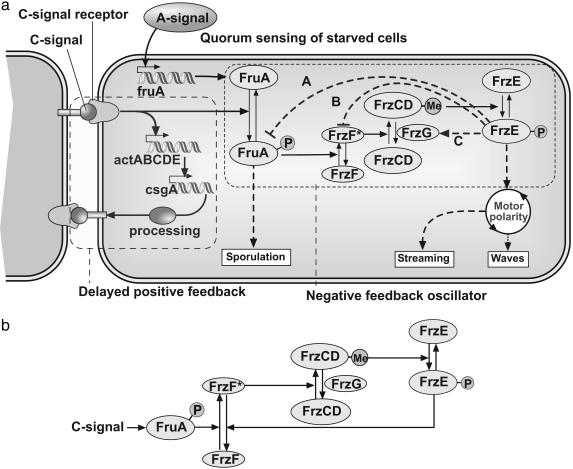



Differential equations after simplification:
$$
\begin{aligned}
     \frac{d[Frz]}{dt} &= k_0 \frac{( 1 - [FrzE] )(1 - [Frz] )}{1 - [Frz] + K_0}
                        - \bar{k}_0 \frac{[Frz]}{Frz + \bar{K}_0}\\
   \frac{d[FrzCD]}{dt} &= \bar{k}_1 \frac{1 - [FrzCD]}{1 - [FrzCD] + \bar{K}_1}
                        - k_1 \frac{(1 - [Frz])  [FrzCD]}{[FrzCD] + K_1}\\
    \frac{d[FrzE]}{dt} &= \bar{k}_2 \frac{1 - [FrzE]}{1 - [FrzE] + \bar{K}_2}
                        - k_2 \frac{(1 - [FrzCD]) [FrzE]}{[FrzE] + K_2}
\end{aligned}
$$


| Parameter | \$k\_1\$        | \$k\_2\$        | \$k\_3\$        | \$K\_1\$             | \$K\_2\$             | \$K\_3\$             | \$\bar{k}\_1\$     | \$\bar{k}\_2\$  | \$\bar{k}\_3\$  | \$\bar{K}\_1\$ | \$\bar{K}\_2\$       | \$\bar{K}\_3\$       |
| --------- | --------------- | --------------- | --------------- | -------------------- | -------------------- | -------------------- | ------------------ | --------------- | --------------- | -------------- | -------------------- | -------------------- |
| **Value** | \$1\~min^{-1}\$ | \$4\~min^{-1}\$ | \$4\~min^{-1}\$ | \$5 \times 10^{-3}\$ | \$5 \times 10^{-3}\$ | \$5 \times 10^{-3}\$ | \$0.08\~min^{-1}\$ | \$2\~min^{-1}\$ | \$2\~min^{-1}\$ | \$0.01\$       | \$5 \times 10^{-3}\$ | \$5 \times 10^{-3}\$ |


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define function calculating derivatives
def func_Frz(variables, t):
    k = [1, 4, 4]
    k_bar = [0.08, 2, 2]
    K = [0.005, 0.005, 0.005]
    K_bar = [0.01, 0.005, 0.005]
    [Frz, FrzCD, FrzE] = variables
    # calculate derivatives
    dFrz = k[0] * (1-FrzE) * (1-Frz) / (1-Frz+K[0])\
         - k_bar[0] * Frz / (Frz+K_bar[0])
    dFrzCD = k_bar[1] * (1-FrzCD) / (1-FrzCD+K_bar[1])\
           - k[1] * (1-Frz) * FrzCD / (FrzCD+K[1])
    dFrzE = k_bar[2] * (1-FrzE) / (1-FrzE+K_bar[2])\
          - k[2] * (1-FrzCD) * FrzE / (FrzE+K[2])
    # return the states
    return [dFrz, dFrzCD, dFrzE]

initial_position = [1, 1, 1]
t = np.arange(0.0, 30.0, 0.01)
solution = odeint(func_Frz, initial_position, t)
result = np.transpose(solution)

plots = [plt.plot(t, _result)[0] for _result in result]
legends = [r'[Frz]/[Frz]tot', r'[FrzCD]/[FrzCD]tot',\
           r'[FrzE]/[FrzE]tot']
plt.legend(plots, legends, loc=1)
plt.xlabel(r'time, $t$, min', fontsize=16)
plt.ylabel(r'relative concentration, [X]/[X]tot',\
           fontsize=16)
# save results
plt.draw()

# **4.** Myxococcus xantus C-signal pathway and external influence

For more details please see article:

Igoshin, Oleg A., Albert Goldbeter, Dale Kaiser, and George Oster. "A biochemical oscillator explains several aspects of Myxococcus xanthus behavior during development." *Proceedings of the National Academy of Sciences* 101, no. 44 (2004): 15760-15765.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define function calculating derivatives
def func_Frz(variables, t):
    k = [1, 4, 4]
    k_bar = [0.08, 2, 2]
    if t > 30:
        k_bar = [0.58, 2, 2]
    K = [0.005, 0.005, 0.005]
    K_bar = [0.01, 0.005, 0.005]
    [Frz, FrzCD, FrzE] = variables
    # calculate derivatives
    dFrz = k[0] * (1-FrzE) * (1-Frz) / (1-Frz+K[0])\
         - k_bar[0] * Frz / (Frz+K_bar[0])
    dFrzCD = k_bar[1] * (1-FrzCD) / (1-FrzCD+K_bar[1])\
           - k[1] * (1-Frz) * FrzCD / (FrzCD+K[1])
    dFrzE = k_bar[2] * (1-FrzE) / (1-FrzE+K_bar[2])\
          - k[2] * (1-FrzCD) * FrzE / (FrzE+K[2])
    # return the states
    return [dFrz, dFrzCD, dFrzE]

initial_position = [1, 1, 1]
t = np.arange(0.0, 60.0, 0.01)
solution = odeint(func_Frz, initial_position, t)
result = np.transpose(solution)

plots = [plt.plot(t, _result)[0] for _result in result]
legends = [r'[Frz]/[Frz]tot', r'[FrzCD]/[FrzCD]tot',\
           r'[FrzE]/[FrzE]tot']
plt.legend(plots, legends, loc=1)
plt.xlabel(r'time, $t$, min', fontsize=16)
plt.ylabel(r'relative concentration, [X]/[X]tot',\
           fontsize=16)
plt.plot([30, 30], [0, 1], 'k:', lw=2)
plt.text(28, 0.2, r'SIGNAL', fontsize=20, rotation=90)
# save results
plt.draw()

# **5.** Saccharomyces cerevisiae glycolytic oscillations

For more details please see article:

Bier, Martin, Barbara M. Bakker, and Hans V. Westerhoff. "How yeast cells synchronize their glycolytic oscillations: a perturbation analytic treatment." *Biophysical Journal* 78, no. 3 (2000): 1087-1093.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def func_G_ATP(variables, t, Km):
    Vin = 0.36
    k1 = 0.02
    kp = 6
    [G, ATP] = variables
    # calculate derivatives
    dG = Vin - k1 * G * ATP
    dATP = 2 * k1 * G *ATP - kp * ATP / (ATP + Km)
    # return the states
    return [dG, dATP]

initial_position = [1, 1]
t = np.arange(0.0, 600.0, 1)
K_low = 12
K_high = 20
low_const = lambda v, time: func_G_ATP(v, time, Km=K_low)
high_const = lambda v, time: func_G_ATP(v, time, Km=K_high)

solution = odeint(low_const, initial_position, t)
result = np.transpose(solution)
plots = [plt.plot(t, _result)[0] for _result in result]
legends = [r'[G]', r'[ATP]']
plt.legend(plots, legends, loc=1)
plt.xlabel(r'time, $t$, min', fontsize=16)
plt.ylabel(r'relative concentration, [X]', fontsize=16)
plt.text(300, 21, r"$K_m = $" + str(K_low), fontsize=20)
# save results
plt.draw()
#plt.savefig('day_7_1.eps')

plt.clf()
solution = odeint(high_const, initial_position, t)
result = np.transpose(solution)
plots = [plt.plot(t, _result)[0] for _result in result]
legends = [r'[G]', r'[ATP]']
plt.legend(plots, legends, loc=1)
plt.xlabel(r'time, $t$, min', fontsize=16)
plt.ylabel(r'relative concentration, [X]', fontsize=16)
plt.text(300, 12, r"$K_m = $" + str(K_high), fontsize=20)
# save results
plt.draw()


# **6.** Saccharomyces cerevisiae glycolytic oscillations, phase portrait

For more details please see article:

Bier, Martin, Barbara M. Bakker, and Hans V. Westerhoff. "How yeast cells synchronize their glycolytic oscillations: a perturbation analytic treatment." *Biophysical Journal* 78, no. 3 (2000): 1087-1093.

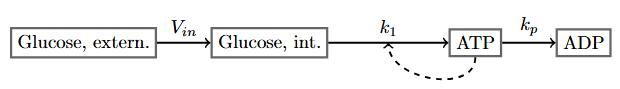

Differential equations:
$$
\begin{aligned}
    \frac{d[G]}{dt}   &= V_{in} - k_1 [G] [ATP],\\
    \frac{d[ATP]}{dt} &= 2 k_1 [G] [ATP] - k_p \frac{[ATP]}{[ATP] + Km}.
\end{aligned}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define function calculating derivatives
def func_G_ATP(variables, t, Km, Vin=0.36, k1=0.02, kp=6):
    [G, ATP] = variables
    dG = Vin - k1 * G * ATP
    dATP = 2 * k1 * G *ATP - kp * ATP / (ATP + Km)
    return [dG, dATP]

# define function for painting arrows
def calc_arrows(data_array, threshold):
    solution_diffs = np.hstack((data_array[:-1, :],\
         np.transpose(np.diff(np.transpose(data_array)))))
    arrows = []
    for [x, y, dx, dy] in solution_diffs:
        use_this = True
        for [ax, ay, dax, day] in arrows:
            if (ax - x)**2 + (ay - y)**2 < threshold:
                use_this = False
                break
        if use_this:
            norm = np.sqrt(dx**2 + dy**2)
            arrows.append([x, y, dx/norm, dy/norm])
    return np.transpose(arrows)

# solving and plotting function
def do_plotting(_Km, _initial, _time, _scale,
                _filename, _tx, _ty):
    l_func = lambda v, time: func_G_ATP(v, time, Km=_Km)
    solution = odeint(l_func, _initial, _time)
    plt.plot(solution[:, 0], solution[:, 1])
    arrows = calc_arrows(solution, .5)
    plt.quiver(arrows[0],arrows[1],arrows[2],arrows[3],\
               scale_units='xy',angles='xy',scale=_scale)
    plt.xlabel(r'glucose, [G]', fontsize=16)
    plt.ylabel(r'ATP, [ATP]', fontsize=16)
    plt.text(_tx, _ty, r"$K_m = " + str(_Km) + "$",\
             fontsize=20)
    plt.draw()
    plt.savefig(_filename)

initial_position = [10, 5]
t = np.arange(0.0, 600.0, 0.1)
K_low = 12
K_high = 20

#do_plotting(K_low, initial_position, t, 1,\
#            'day_8_1.eps', 20, 14)
#plt.clf()
#do_plotting(K_high, initial_position, t, 5,\
#            'day_8_2.eps', 6, 7)


In [ ]:
do_plotting(K_low, initial_position, t, 1,\
            'day_8_1.eps', 20, 14)

In [ ]:
do_plotting(K_high, initial_position, t, 5,\
            'day_8_2.eps', 6, 7)

# **7.** Saccharomyces cerevisiae glycolytic oscillations, bifurcation

For more details please see article:

Bier, Martin, Barbara M. Bakker, and Hans V. Westerhoff. "How yeast cells synchronize their glycolytic oscillations: a perturbation analytic treatment." *Biophysical Journal* 78, no. 3 (2000): 1087-1093.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define function calculating derivatives
def func_G_ATP(variables, t, Km, Vin=0.36, k1=0.02, kp=6):
    [G, ATP] = variables
    # calculate derivatives
    dG = Vin - k1 * G * ATP
    dATP = 2 * k1 * G *ATP - kp * ATP / (ATP + Km)
    # return the states
    return [dG, dATP]

# fixed point
def fixed_point(_Km, Vin=0.36, k1=0.02, kp=6):
    return (kp - 2 * Vin) / (2 * k1 * _Km)

Km = np.arange(10, 25, .1)
t = np.arange(0.0, 600.0, 0.1)
initial_position = [10, 5]

KmMAX = []
KmMIN = []
for _Km in Km:
    l_func = lambda v, time: func_G_ATP(v, time, Km=_Km)
    solution = odeint(l_func, initial_position, t)
    KmMAX.append(np.amax(solution[5000:, 0]))
    KmMIN.append(np.amin(solution[5000:, 0]))
K_fixed = fixed_point(Km)

plt.plot(Km, KmMAX)
plt.plot(Km, KmMIN)
plt.fill_between(Km, KmMIN, KmMAX, facecolor='yellow')
plt.plot(Km, K_fixed)
plt.ylabel(r'glucose, [G]', fontsize=16)
plt.xlabel(r'Km', fontsize=16)
plt.text(13, 18, r"$[G]_{max}$", fontsize=20)
plt.text(14, 3, r"$[G]_{min}$", fontsize=20)
plt.text(12, 12, r"$[G]_{fixed}$", fontsize=20)
plt.text(11, 15, r"Oscillations", fontsize=20, rotation=90)
plt.text(20, 8, r"Fixed point", fontsize=20)
plt.draw()

# **8.** Bio-switch with co-acivation

For more details please see article:

Tyson, John J., Katherine C. Chen, and Bela Novak. "Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell." *Current opinion in cell biology* 15, no. 2 (2003): 221-231.

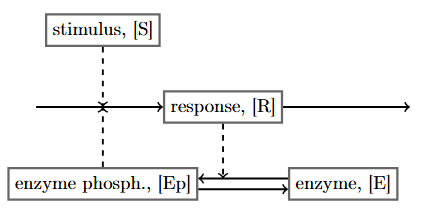

Diferential equations:
$$
\begin{aligned}
    \frac{d[R]}{dt} &= k_{R0} ([E]_{tot} - [E]) + [S](t) - k_{R1} [R],\\
    \frac{d[E]}{dt} &= k_{E0} \frac{[E]_{tot} - [E]}{[E]_{tot} - [E] + K_{0}} - k_{E1} \frac{[R] [E]}{[E] + K_{1}}.
\end{aligned}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# define function calculating derivatives
def func_act(variables, t, S=lambda time:50):
    [R, E] = variables
    k_R = [0.22, 0.001]
    k_E = [0.8, 0.01]
    Km = [0.01, 0.01]
    E_total = 0.5
    dR = k_R[0] * (E_total - E) + S(t) - k_R[1] * R
    dE = k_E[0] * (E_total - E) / (E_total - E + Km[0])\
       - k_E[1] * R * E / (E + Km[1])
    return [dR, dE]


# define gaussian function
def gaussian(x, a, c, s):
    return a * np.exp(-(x - c)**2 / (2 * s**2) )


S = lambda time:   gaussian(time, .05, 10000, 1000) \
                 + gaussian(time, .1, 30000, 1000) \
                 + gaussian(time, .15, 50000, 1000) \
                 + gaussian(time, .2, 70000, 1000)
initial_position = [0, 0]
t = np.arange(0.0, 100000.0, 1)

diff_eqs = lambda vars, time: func_act(vars, time, S)
solution = odeint(diff_eqs, initial_position, t)
result = np.transpose(solution)
signal = [1000 * S(_t) for _t in t]

plots = [plt.plot(t, result[0])[0],plt.plot(t, signal)[0]]
legends = [r'$[R]$', r'$1000 \times [S]$']
plt.legend(plots, legends, loc=2)
plt.xlabel(r'time, $t$, sec', fontsize=16)
plt.ylabel(r'concentration, [X]',\
           fontsize=16)
# save results
plt.draw()
#plt.savefig('day_10_1.eps')


# **9.** Bio-switch with co-activation, bifurcation diagram

For more details please see article:

Tyson, John J., Katherine C. Chen, and Bela Novak. "Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell." *Current opinion in cell biology* 15, no. 2 (2003): 221-231.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define function calculating derivatives
def func_act(variables, t, S=0):
    [R, E] = variables
    k_R = [0.22, 0.001]
    k_E = [0.8, 0.01]
    Km = [0.01, 0.01]
    E_total = 0.5
    dR = k_R[0] * (E_total - E + S) - k_R[1] * R
    dE = k_E[0] * (E_total - E) / (E_total - E + Km[0])\
       - k_E[1] * R * E / (E + Km[1])
    return [dR, dE]

initial_low = [0, 0]
initial_high = [200, 0]
t = np.arange(0.0, 100000.0, 1)
S = np.arange(0, 0.5, 0.01)

low_R = []
high_R = []
for _S in S:
    diff_eqs = lambda vars, time: func_act(vars, time, _S)
    solution = odeint(diff_eqs, initial_low, t)
    low_R.append(solution[-1,0])
    solution = odeint(diff_eqs, initial_high, t)
    high_R.append(solution[-1,0])

Sthr = S[-1]
for [_low_R,_high_R,_S] in np.transpose([low_R,high_R,S]):
    if _high_R - _low_R < 0.001:
        Sthr = _S
        break

plots = [plt.plot(S, high_R)[0], plt.plot(S, low_R)[0]]
legends = [r'$[R]_{min}^{stable}$',r'$[R]_{max}^{stable}$']
plt.legend(plots, legends, loc=2)
plt.xlabel(r'signal strength, [S]', fontsize=16)
plt.ylabel(r'response, [R]', fontsize=16)
plt.axvline(x=Sthr, color='k', ls='dashed')
plt.text(Sthr, high_R[0], r'bifurcation', fontsize=20,\
         rotation=90)
# save results
plt.draw()
plt.savefig('day_11_1.eps')


# **10.** Bio-switch with co-repression

For more details please see article:

Tyson, John J., Katherine C. Chen, and Bela Novak. "Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell." *Current opinion in cell biology* 15, no. 2 (2003): 221-231.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# define function calculating derivatives
def func_act(variables, t, S=lambda time:50):
    [R, E] = variables
    k_R = [1, 1, 0.01, 0.01]
    k_E = [0.8, 0.01]
    Km = [0.01, 0.01]
    E_total = 0.5
    dR = k_R[0] + k_R[1]*S(t) - (k_R[2] + k_R[3]*E)*R
    dE = k_E[0] * (E_total - E) / (E_total - E + Km[0])\
       - k_E[1] * R * E / (E + Km[1])
    return [dR, dE]


# define gaussian function
def gaussian(x, a, c, s):
    return a * np.exp(-(x - c)**2 / (2 * s**2) )


S = lambda time:  gaussian(time, .01, 10000, 2000) \
                + gaussian(time, .02, 30000, 2000) \
                + gaussian(time, .03, 50000, 2000) \
                + gaussian(time, .05, 70000, 2000)
initial_position = [0, 0.1]
t = np.arange(0.0, 100000.0, 1)

diff_eqs = lambda vars, time: func_act(vars, time, S)
solution = odeint(diff_eqs, initial_position, t)
result = np.transpose(solution)
signal = [1000*S(_t) for _t in t]

plots = [plt.plot(t, result[0])[0],plt.plot(t, signal)[0]]
legends = [r'$[R]$', r'$1000 \times [S]$']
plt.legend(plots, legends, loc=2)
plt.xlabel(r'time, $t$, sec', fontsize=16)
plt.ylabel(r'concentration, [X]',\
           fontsize=16)
# save results
plt.draw();
#plt.savefig('day_12_1.eps');


# **11.** Bio-switch with co-repression, bifurcation diagram

For more details please see article:

Tyson, John J., Katherine C. Chen, and Bela Novak. "Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell." *Current opinion in cell biology* 15, no. 2 (2003): 221-231.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define function calculating derivatives
def func_act(variables, t, S=50):
    [R, E] = variables
    k_R = [1, 1, 0.01, 0.01]
    k_E = [0.8, 0.01]
    Km = [0.01, 0.01]
    E_total = 0.5
    dR = k_R[0] + k_R[1]*S - (k_R[2] + k_R[3]*E)*R
    dE = k_E[0] * (E_total - E) / (E_total - E + Km[0])\
       - k_E[1] * R * E / (E + Km[1])
    return [dR, dE]

initial_low = [0, 0]
initial_high = [200, 0]
t = np.arange(0.0, 100000.0, 1)
S = np.arange(0, 0.1, 0.01)

low_R = []
high_R = []
for _S in S:
    diff_eqs = lambda vars, time: func_act(vars, time, _S)
    solution = odeint(diff_eqs, initial_low, t)
    low_R.append(solution[-1,0])
    solution = odeint(diff_eqs, initial_high, t)
    high_R.append(solution[-1,0])

Sthr = S[-1]
for [_low_R,_high_R,_S] in np.transpose([low_R,high_R,S]):
    if _high_R - _low_R < 0.001:
        Sthr = _S
        break

plots = [plt.plot(S, high_R)[0], plt.plot(S, low_R)[0]]
legends = [r'$[R]_{min}^{stable}$',r'$[R]_{max}^{stable}$']
plt.legend(plots, legends, loc=2)
plt.xlabel(r'signal strength, [S]', fontsize=16)
plt.ylabel(r'response, [R]', fontsize=16)
plt.axvline(x=Sthr, color='k', ls='dashed')
plt.text(Sthr, high_R[0], r'bifurcation', fontsize=20,\
         rotation=90)
# save results
plt.draw();
plt.savefig('day_13_1.eps');

#Widget



For more details please see the article:

Tyson, John J., Katherine C. Chen, and Bela Novak. "Sniffers, buzzers, toggles and blinkers: dynamics of regulatory and signaling pathways in the cell." *Current opinion in cell biology* 15, no. 2 (2003): 221-231.

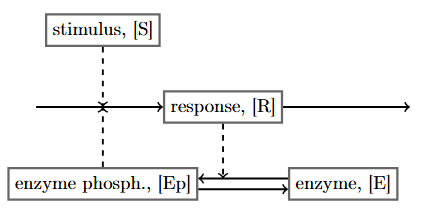

Diferential equations:
$$
\begin{aligned}
    \frac{d[R]}{dt} &= k_{R0} ([E]_{tot} - [E]) + [S](t) - k_{R1} [R],\\
    \frac{d[E]}{dt} &= k_{E0} \frac{[E]_{tot} - [E]}{[E]_{tot} - [E] + K_{0}} - k_{E1} \frac{[R] [E]}{[E] + K_{1}}.
\end{aligned}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider


def func_act(variables, t, S=lambda time:50):
    [R, E] = variables
    k_R = [0.22, 0.001]
    k_E = [0.8, 0.01]
    Km = [0.01, 0.01]
    E_total = 0.5
    dR = k_R[0] * (E_total - E) + S(t) - k_R[1] * R
    dE = k_E[0] * (E_total - E) / (E_total - E + Km[0])\
       - k_E[1] * R * E / (E + Km[1])
    return [dR, dE]

def gaussian(x, a, c, s):
    return a * np.exp(-(x - c)**2 / (2 * s**2) )

# interactive plotting function
def run_simulation(intensity=0.1):
    S = lambda time: gaussian(time, intensity, 30000, 1000)

    initial_position = [0, 0]
    t = np.arange(0.0, 60000.0, 100)

    diff_eqs = lambda vars, time: func_act(vars, time, S)
    solution = odeint(diff_eqs, initial_position, t)
    result = np.transpose(solution)
    signal = [1000 * S(_t) for _t in t]

    # plotting
    plt.figure(figsize=(10,5))
    plt.plot(t, result[0], label=r'$[R]$')
    plt.plot(t, signal, label=r'$1000 \times [S]$')
    plt.legend(loc=2)
    plt.xlabel(r'time, $t$, sec', fontsize=14)
    plt.ylabel(r'concentration, [X]', fontsize=14)
    plt.title(f"Pulse intensity = {intensity}")
    plt.grid(True)
    plt.ylim(0, 250)
    plt.show()

# interactive slider
interact(
    run_simulation,
    intensity=FloatSlider(value=0.0, min=0.0, max=0.2, step=0.01, description="Pulse Intensity")
)
